<a href="https://colab.research.google.com/github/mevahmarlene/GESTION-HOTEL/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**
**Importing the required python libraries like numpy, seaborn, matplotlib, tensorflow.**

In [ ]:
# Importing all the required Libraries for Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import os

# Removing all those annoying Warnings

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=r"C:\Users\Lester\Documents\fer 2013"

In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(data)

['test', 'train']

In [ ]:
#setting up test and train path
test_path = data +'\\test\\'
train_path = data +'\\train\\'

In [ ]:
#list the directory of test path
os.listdir(test_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
#list the directory of trian path
os.listdir(train_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
#getting the first image of angry folder
os.listdir(train_path+'\\angry')[0]

'Training_10118481.jpg'

In [ ]:
img = train_path+'\\angry'+'\\Training_10118481.jpg'

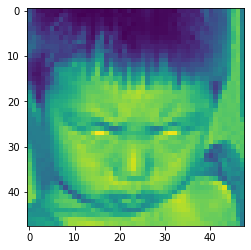

In [ ]:
#showing the first image of angry folder
plt.imshow(imread(img))

In [ ]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

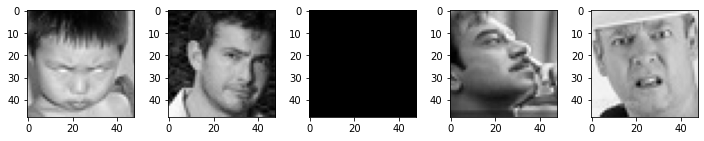

In [ ]:
#sample of angry class
plot_images(train_path+'/angry')

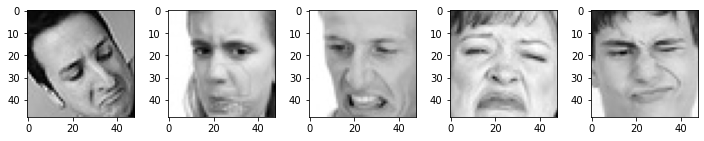

In [ ]:
#sample of disgust class
plot_images(train_path+'/disgust')

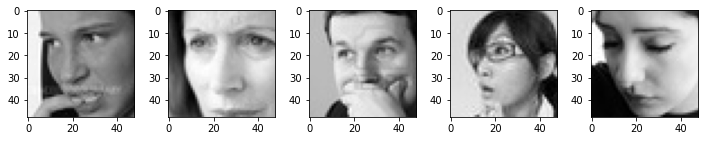

In [ ]:
#sample of fear class
plot_images(train_path+'/fear')

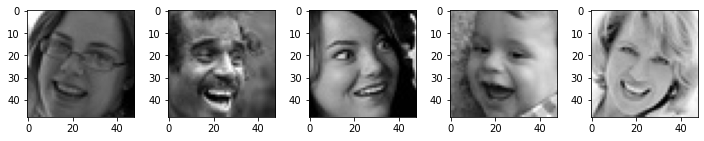

In [ ]:
#sample of happy class
plot_images(train_path+'/happy')

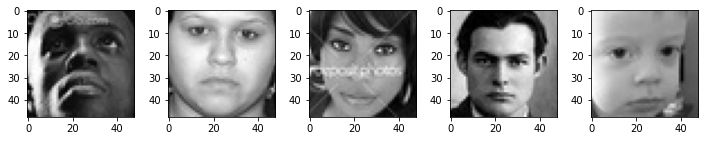

In [ ]:
#sample of neutral class
plot_images(train_path+'/neutral')

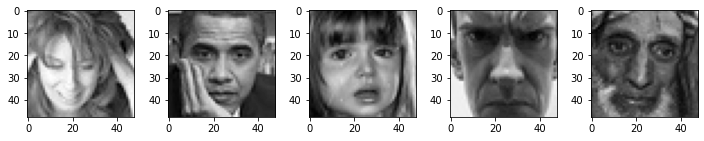

In [ ]:
#sample of sad class
plot_images(train_path+'/sad')

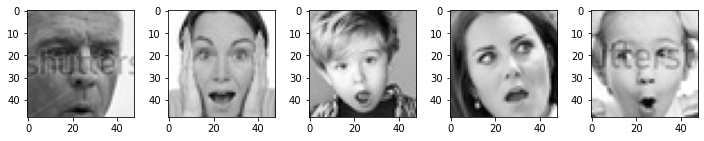

In [ ]:
#sample of surprise class
plot_images(train_path+'/surprise')

In [ ]:
for expression in os.listdir(train_path):
    print(str(len(os.listdir(train_path + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


## **Setup the data generators for CNN model**

**Now we will generate training and testing (validation) batches.**

In [ ]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
# Creating  Training Dataset

train_gen=training_gen.flow_from_directory(train_path,
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set

test_gen=testing_gen.flow_from_directory(test_path,
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.**
**As of now we have imported libraries, got dataset, and created train and test images.**

In [ ]:
#printing the class indicies og train_gen
print(train_gen.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


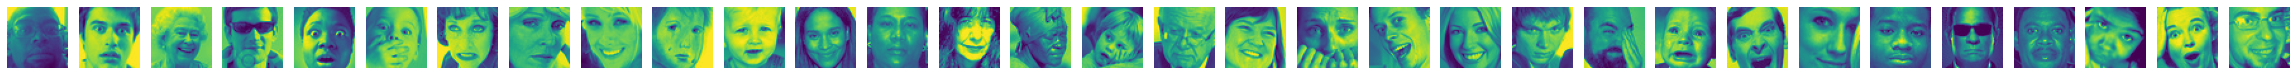

neutral   surprise   happy   neutral   surprise   surprise   fear   sad   happy   sad   neutral   happy   neutral   happy   sad   neutral   sad   happy   fear   happy   happy   neutral   sad   sad   fear   happy   neutral   neutral   neutral   angry   surprise   happy   

In [ ]:
imgs,lables=next(train_gen)                                                                   # Extracting next batch to plot it, this batch of photos are selected randomly
list_of_keys=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']                  # list of Classes
def plotImages(images_arr):
  fig, axes= plt.subplots(1,32,figsize=(32,2))
  axes= axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(imgs)
for i in lables[:32]:                                                                             # Printing the lables below the respective image
  for num, j in enumerate(i):
    if j==1:
      print(list_of_keys[num], end='   ')                                                         # Labelling seems to be spot on
num+=1

## **Building the CNN Model**
**We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.**

In [ ]:
# from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

## **We define our CNN with the following global architecture:**

* 4 convolutional layers
* 2 fully connected layers

## **Basic CNN architecture details:**

* Input layer - Input layer in CNN should contain image data
* Convo layer - Convo layer is sometimes called feature extractor layer because features of the image are get extracted within this layer
* Pooling layer - Pooling is used to reduce the dimensionality of each features while retaining the most important information. It is used between two convolution layer
* Fully CL - Fully connected layer involves weights, biases, and neurons. It connects neurons in one layer to neurons in another layer. It is used to classify images between different category by training and placed before the output layer
* Output Layer - Output layer contains the label which is in the form of one-hot encoded

**Also we use some common techniques for each layer**

* Batch normalization: improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
* Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.

## **Train the model**
**Now it’s time to train the model and evaluate the results.**

In [ ]:
# Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting

checkpoint = ModelCheckpoint('./my_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')          # Adding various Call Backs Like Early stopping to prevent overfitting and Decay Learning Rate to prevent Overshooting

#early stopping
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
decay_lr= ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[early_stopping,checkpoint,decay_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
#fitting the generator

history = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks
                                )

Epoch 1/40
897/897 [==============================] - 4541s 5s/step - loss: 1.7112 - accuracy: 0.3426 - val_loss: 1.6503 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 40928s 46s/step - loss: 1.3554 - accuracy: 0.4808 - val_loss: 1.2965 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 9989s 11s/step - loss: 1.2368 - accuracy: 0.5303 - val_loss: 1.2345 - val_accuracy: 0.5237 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 3600s 4s/step - loss: 1.1768 - accuracy: 0.5552 - val_loss: 1.1522 - val_accuracy: 0.5665 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 3135s 3s/step - loss: 1.1186 - accuracy: 0.5755 - val_loss: 1.3076 - val_accuracy: 0.5123 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 3146s 4s/step - loss: 1.0684 - accuracy: 0.5960 - val_loss: 1.2370 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 7/40
897/897 [==============================] - 3

* ## **Our best model managed to obtain a accuracy of approximately 82% and val_accuracy of 65% on the dataset by running 50 epochs.which is quite good.**
* ## **At each epoch, Keras checks if our model performed better than the models of the previous epochs.**


In [ ]:
predictions=model.predict(test_gen)                                                                               # Predicting For Test Set
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                                  # Printing Confution Matrix
cm

array([[ 484,    8,   60,   75,  178,  118,   35],
       [  31,   50,    6,   10,    4,    5,    5],
       [ 105,    5,  314,   61,  175,  190,  174],
       [  40,    0,   20, 1527,  101,   53,   33],
       [  54,    3,   51,  125,  816,  165,   19],
       [ 115,    0,  114,  107,  291,  581,   39],
       [  15,    1,   29,   65,   33,   12,  676]], dtype=int64)

In [ ]:
aoc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)                                    # Accuracy Score of Our Model
aoc

0.619671217609362

## **Saving Model**

In [ ]:
model.save('Malik_CNN_model.h5')

In [ ]:
%pwd

'C:\\Users\\Lester\\Desktop\\Python_code'

## **Plotting Accuracy & Loss to analyze the results**

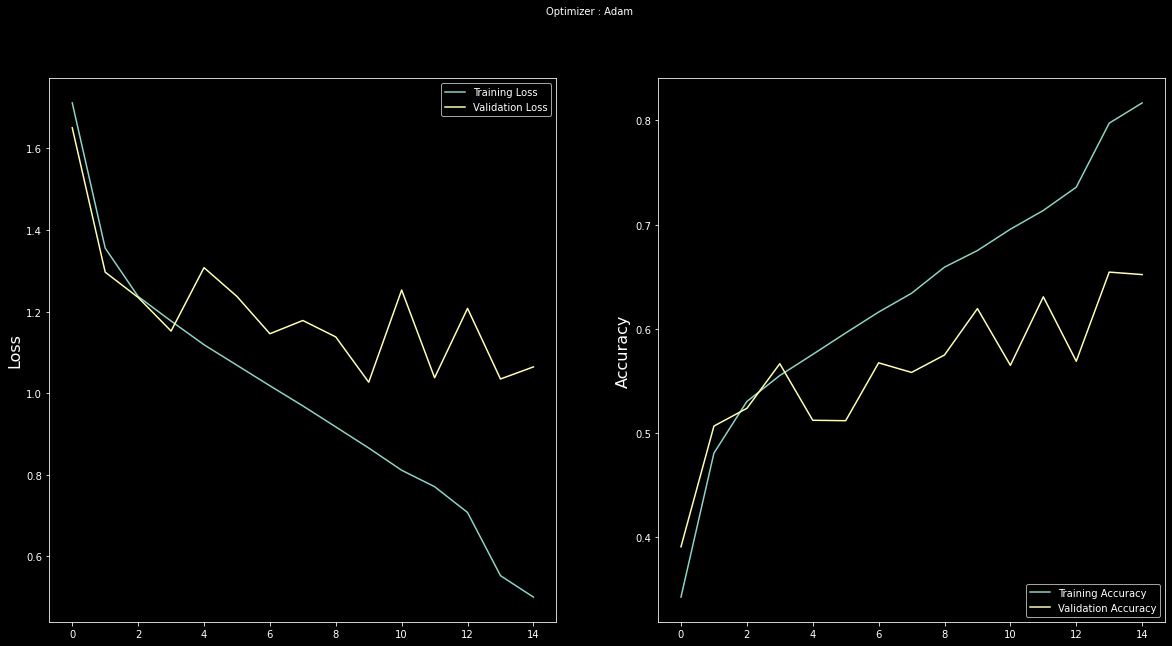

In [ ]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## **The training loss is slightly higher than the validation loss for the first epochs.**

## **Confusion matrix**
**Finally we can plot the confusion matrix in order to see how our model classified the images:**

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

<Figure size 432x288 with 0 Axes>

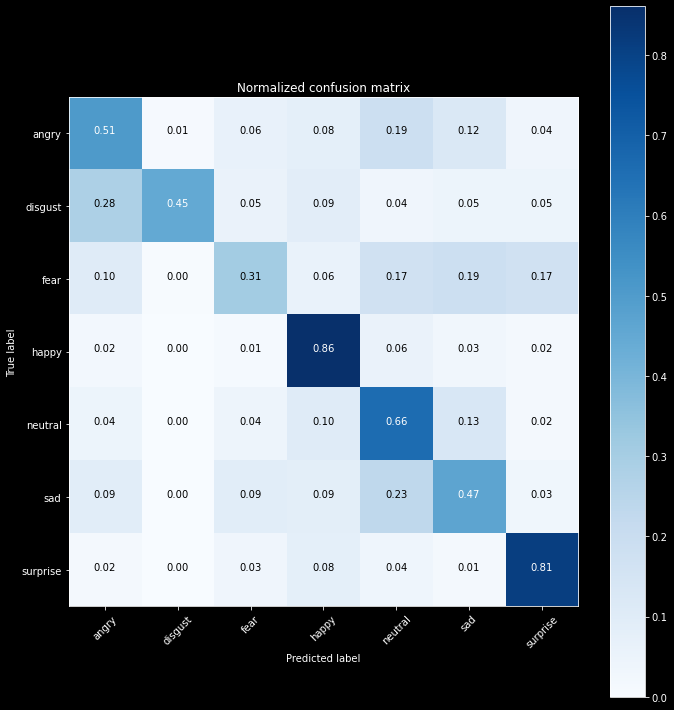

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=test_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_gen.classes
class_names = test_gen.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

## **Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces maybe because it confuses them with sad faces.**

## **Real Time Face Prediction**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import tensorflow as tf

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # Face Detection
classifier =load_model("Malik_CNN_model.h5")  #Load model

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']  # Emotion that will be predicted

cap = cv2.VideoCapture(0)  ## Opening webcam



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction

            prediction = classifier.predict(roi)[0]   #Prediction
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## **Conclusion**
* **Our model is giving an accuracy of 82% and is robust in that it works well even in a dim light environment.**
* **The application is able to detect face location and predict the right expression while checking it on a local webcam.**
* **The front-end of the model was made using streamlit for webapp and running well on local webapp link.**
* **Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit share that runs on a web server.**
* **And I believe that through this model teachers can understand the students' perception during online classes and change the way of teaching if needed by understanding the students’ motive.**